## Qiskit Session 2  - First Quantum Algorithms

---



In this last practical session you will run on quantum machine your first quantum algorithms by implementing the algorithms seen in class.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/quantum_computer.jpeg'  width="300px" />    
    </tr>
</table>


---
## Get ready
As usual one first  import Qiskit and the vizualisation tools
```Python
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
```
And as well we load the simulator and the IBM account:

```Python
simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibmq_16_melbourne')
from qiskit.tools.monitor import job_monitor

```
   

In [50]:
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
simulator=Aer.get_backend('qasm_simulator')
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q-research')
qcomputer=provider.get_backend('ibmq_jakarta')
from qiskit.tools.monitor import job_monitor


ibmqfactory.load_account:WARNING:2022-12-16 17:50:51,664: Credentials are already in use. The existing account in the session will be replaced.


### Create an oracle

We have seen in class that it is always possible to implement a classical function with a quantum computer. Here we are going to implement classical functions usefull to run the Deutsh and Deutsch-Josza algorithm.

Consider the following circuit:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_balanced1.svg'  width="300px" />    
    </tr>
</table>

Implement this circuit and check that it corresponds to a unitary gate $U_f$ such that $U_f|x_0x_2x_3>|y>=|x_0x_1x_2>|y\oplus f(x_0,x_1,x_2)>$ where $f$ is a boolean function that satisfies:


|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$000$ |$111$|
|$011$ |$100$|
|$101$ |$010$|
|$110$ |$001$|

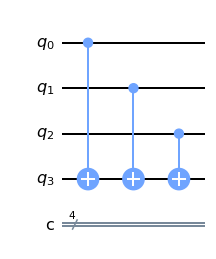

In [8]:
circuit=QuantumCircuit(4,4)
for i in range(3):
    circuit.cx(i,3)
circuit.draw('mpl')

Modify the previous circuit to create an other oracle $U_f$ that is defined by

|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$010$ |$101$|
|$011$ |$100$|
|$111$ |$000$|
|$110$ |$001$|

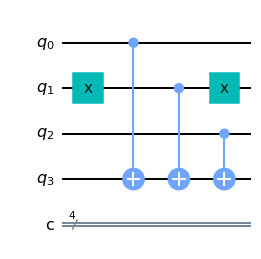

In [9]:
circuit=QuantumCircuit(4,4)
circuit.x(1)
for i in range(3):
    circuit.cx(i,3)
circuit.x(1)
circuit.draw('mpl')

What would be an oracle for a constant function $f(x_0,\dots,x_n)=k$ with $k\in\{0,1\}$ ?

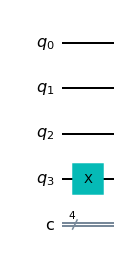

In [13]:
circuit=QuantumCircuit(4,4)
circuit.x(3)
circuit.draw('mpl')

## Deutsch-Josza

Recall the circuit of the Deutsch-Josza algorithm that generalizes Deutsch algorithm

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_steps.png'  width="400px" />    
    </tr>
</table>

Define a constant oracle $U_{f_1}$ and a balanced oracle $U_{f_2}$ of your choice and check on your example the validity of Deutsch-Josza's algorithm.

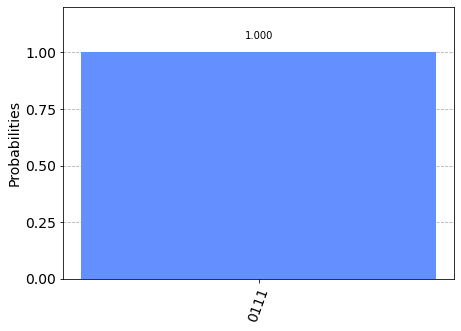

In [36]:
circuit=QuantumCircuit(4,4)
circuit.x(3)
circuit.h(range(4))
circuit.barrier()
for i in range(3):
    circuit.cx(i,3)
circuit.barrier()
circuit.h(range(3))
circuit.measure(range(3),range(3))
circuit.draw('mpl')
job=execute(circuit,simulator).result()
result=job.get_counts()
plot_histogram(result)

## Bernstein-Vazirani

Bernstein-Vazirani algorithm is an algorithm that solve the following problem:
Let $u=u_{n-1}\dots u_0\in \{0,1\}^n$ an unknown $n$-bits string. Suppose you have a classical function $f:\{0,1\}^n\to \{0,1\}$ which calculates $f_u(x)=x.u [2]$ where $x.u$ is the usual inner product between $n$-bits strings, i.e. $x=x_{n-1}\dots x_0$ and $$x.u=x_0u_0+x_1u_1+\dots+x_{n-1}u_{n-1}$$

The goal of Bernstein-Vazirani's algorithm is to find $u$.

Recall that classically you can find $u$ by testing $n$ values $x\in \{0,1\}^n$. Bernstein-Vazirani's algorithm solves the problem by using only once the function $f$.

### Implementing the function $f_u$

Show that the following circuit implements on the function $f_u$ with $u=1101$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vaziraniu.png'  width="330px" />    
    </tr>
</table>

Implement a circuit that corresponds to the function $f_u$ with $u=1010101$.


Write a Python function that given $u=u_{n-1}\dots u_0$ will creates the Quantum Circuit implementing the gate $U_{f_u}$. 

You can use define $u$ as a sting $u='u_{n-1}\dots u_0'$ and use the Python command: 
```Python 
enumerate
```

### Bernstein-Vazirani Circuit

Here is the circuit of Benrstein-Vazirani's algorithm that allows you to find $u$ by only computing once the function $f_u$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vazirani.png'  width="330px" />    
    </tr>
</table>


Implement Bernstein-Vazirani's algorithm such as, the function $f_u$ is defined by the choice of $u=u_{n-1}\dots u_0$ made by the user and the circuit and measurementsof the circuit are automatically created from the knowledge of $u$.

Test your algorithm on the simulator.

Test your code on a real quantum device.

## Grover's algorithm

Grover's algorithm is based on two gates, the oracle and the diffusion gate.
We will implement Grover's algorithm for a three-qubit system.


### The oracle

Consider the following circuit:


<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/oracle_3qbt.png'  width="330px" />    
    </tr>
</table>

Check that this oracle signs the element $|111>$.
How can you modify if so it signs the element $|101>$ ?

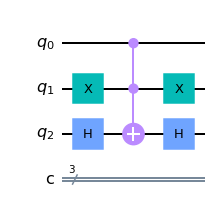

In [40]:
circuit=QuantumCircuit(3,3)
circuit.x(1)
circuit.h(2)
circuit.ccx(0,1,2)
circuit.x(1)
circuit.h(2)
circuit.draw('mpl')

### The diffusion operator

Check that the following circuit corresponds to a CCZ gate i.e. a Control-control $Z$ gate:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/CCZ.png'  width="330px" />    
    </tr>
</table>

The corresponding matrix is 

$$CCZ=\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

And thus the circuit

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion1.png'  width="330px" />    
    </tr>
</table>

corresponds to $-(2|0><0|-I_8)$, i.e.

$$CCZ=-\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & -1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & -1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & -1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

Conclude that the diffusion operator, as explained in the lecture, is given by:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion.png'  width="330px" />    
    </tr>
</table>



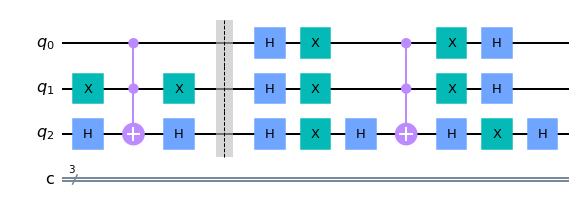

In [41]:
#diffusion
circuit.barrier()
circuit.h(range(3))
circuit.x(range(3))
circuit.h(2)
circuit.ccx(0,1,2)
circuit.h(2)
circuit.x(range(3))
circuit.h(range(3))
circuit.draw('mpl')

### Implement Grover algorithm

Based on the previous question, implement grover's algorithm for $x_0=|101>$ and run it on the simulator and the IBM Quantum Experience

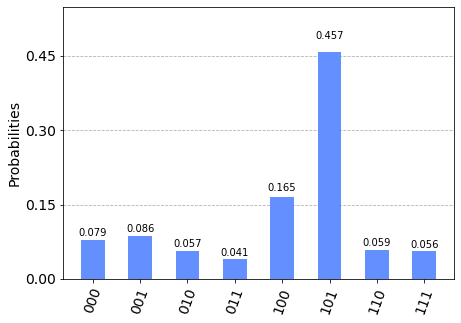

In [52]:
circuit=QuantumCircuit(3,3)
circuit.h(range(3))
for i in range(1):
    #oracle
    circuit.barrier()
    circuit.x(1)
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.x(1)
    circuit.h(2)
    #diffusion
    circuit.barrier()
    circuit.h(range(3))
    circuit.x(range(3))
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    circuit.x(range(3))
    circuit.h(range(3))
circuit.measure(range(3),range(3))
job=execute(circuit,qcomputer).result()
result=job.get_counts()
plot_histogram(result)

## Exercises

### Exercise 1

Write a Qiksit Script that implement Grover's algorithm for a given 3 qubit states $|x_2x_1x_0>$.

### Exercise 2

How would you implement Grover's algorithm for 4 qubits ?
